# Sales Analysis

In this notebook, I will explore and analyze sales data from this dataset
<br>
https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merge file

We have 12 .csv file sales data from every month in 2019. To make our work easier let's merge it first

In [115]:
files = [file for file in os.listdir("./Sales_Data")]
df = pd.concat([pd.read_csv("./Sales_Data/" + file) for file in files])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [116]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Data Cleansing

#### Drop NaN Value

In [118]:
df = df.dropna().reset_index(drop = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Drop Irrelevant Value

In [119]:
df[df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [120]:
df = df.drop(df[df['Quantity Ordered'] == 'Quantity Ordered'].index).reset_index(drop=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"






#### Change datatype of quantity ordered, price each, and order date

In [121]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [122]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Data Exploration

#### What was the best month for sales?
In order to answer this question we need to make month column. For further analysis lets make day, day of week and time column too.

In [123]:
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Day of Week'] = df['Order Date'].dt.dayofweek
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Day of Week
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,6
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,1


Note:
in Day of week, the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.
<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

We also need total sales column by multiplying quantity ordered and price each

In [124]:
df['Total'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Day of Week,Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,6,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,1,11.99


In [125]:
df_month = df.groupby('Month').sum()['Total']
df_month

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Total, dtype: float64

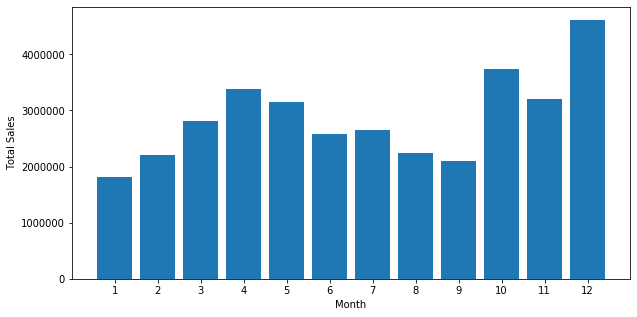

In [126]:
plt.figure(figsize = (10,5))

plt.bar(df_month.index, df_month.values)
plt.xticks(df_month.index)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [127]:
import datetime

#This code round to the previous quarter hour
df['Time'] = df['Order Date'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,15*(dt.minute // 15)))
df['Time'] = df['Time'].dt.time
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Day of Week,Total,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,4,23.90,08:45:00
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,6,99.99,22:30:00
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,600.00,14:30:00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,11.99,14:30:00
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,1,11.99,09:15:00


In [128]:
df_time = df.groupby('Time').sum()['Total']
df_time

Time
00:00:00    221184.97
00:15:00    184454.43
00:30:00    169387.32
00:45:00    138694.55
01:00:00    144082.23
              ...    
22:45:00    371667.17
23:00:00    338638.88
23:15:00    291707.16
23:30:00    290045.63
23:45:00    258912.77
Name: Total, Length: 96, dtype: float64

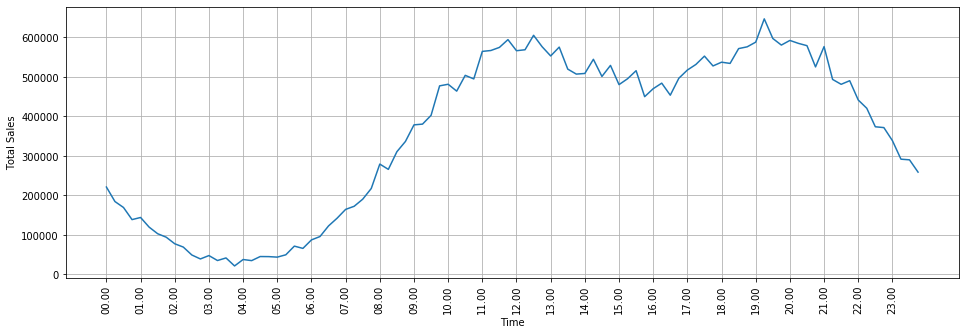

In [129]:
plt.figure(figsize = (16,5))

ticks = [time.strftime('%H.%M') for time in df_time.index]

plt.plot(ticks, df_time.values)
plt.grid()
plt.xticks(ticks, rotation = 'vertical')
plt.locator_params(axis='x', nbins=24)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.show()

#### What day of the week is the best for sales

In [130]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Day of Week,Total,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,4,23.90,08:45:00
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,6,99.99,22:30:00
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,600.00,14:30:00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,11.99,14:30:00
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,1,11.99,09:15:00


In [131]:
#import calendar
#df['Day of Week'] = df['Day of Week'].apply(lambda x: calendar.day_name[x])
#df.head()

In [132]:
df_dayofweek = df.groupby('Day of Week').sum()['Total']
df_dayofweek

Day of Week
0    4.883327e+06
1    5.087957e+06
2    4.988822e+06
3    4.839465e+06
4    4.855938e+06
5    4.904357e+06
6    4.932170e+06
Name: Total, dtype: float64

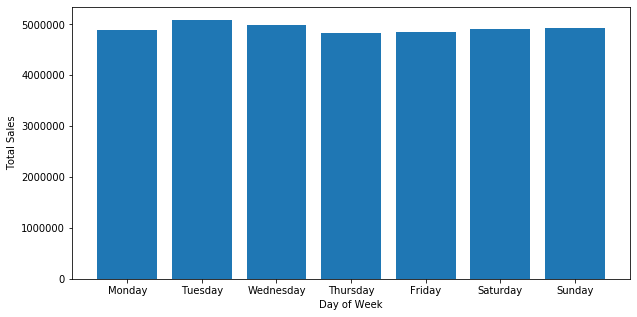

In [170]:
import calendar
plt.figure(figsize = (10,5))

ticks = [calendar.day_name[day] for day in df_dayofweek.index]

plt.bar(df_dayofweek.index, df_dayofweek.values)
plt.xticks(ticks = range(0,7), labels = ticks)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

#### What day is the best for sales

In [146]:
df_day = df.groupby('Day').sum()['Total']
df_day.head()

Day
1    1166319.25
2    1137457.04
3    1074432.90
4    1163857.72
5    1135284.73
Name: Total, dtype: float64

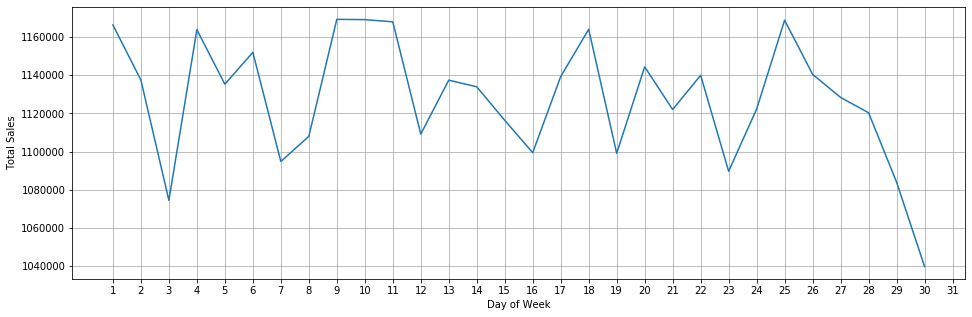

In [151]:
plt.figure(figsize = (16,5))


plt.plot(df_day[0:30].index, df_day[0:30].values)
plt.grid()
plt.xticks(df_day.index)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

#### What city sold the most product?
To answer this question we need to parse city from address

In [152]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Day of Week,Total,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,4,23.90,08:45:00
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,6,99.99,22:30:00
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,600.00,14:30:00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,11.99,14:30:00
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,1,11.99,09:15:00


In [161]:
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1][1:]} {x.split(',')[2][1:3]}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Day of Week,Total,Time,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,4,23.90,08:45:00,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,6,99.99,22:30:00,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,600.00,14:30:00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,4,11.99,14:30:00,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,1,11.99,09:15:00,Los Angeles CA


In [166]:
df_city = df.groupby('City').sum()['Total']
df_city

City
Atlanta GA          2.795499e+06
Austin TX           1.819582e+06
Boston MA           3.661642e+06
Dallas TX           2.767975e+06
Los Angeles CA      5.452571e+06
New York City NY    4.664317e+06
Portland ME         4.497583e+05
Portland OR         1.870732e+06
San Francisco CA    8.262204e+06
Seattle WA          2.747755e+06
Name: Total, dtype: float64

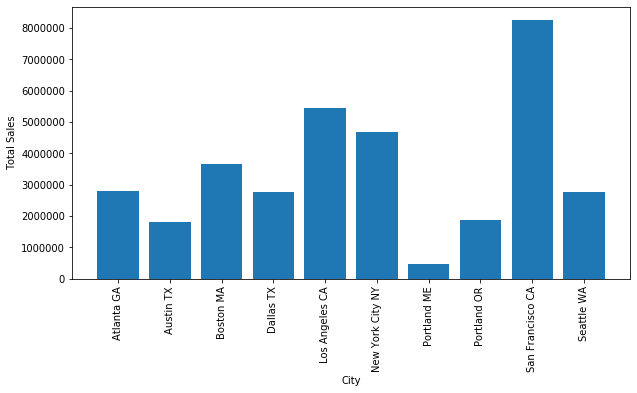

In [169]:
plt.figure(figsize = (10,5))

plt.bar(df_city.index, df_city.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

#### What products are most often sold together?

In [191]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df_id = df[df['Order ID'].duplicated(keep=False)]

df_id['Grouped'] = df_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df_id = df_id[['Order ID', 'Grouped']].drop_duplicates().reset_index(drop=True)
df_id

C:\Users\marse\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
0,176560,"Google Phone, Wired Headphones"
1,176574,"Google Phone, USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
3,176586,"AAA Batteries (4-pack), Google Phone"
4,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
7131,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
7132,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
7133,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
7134,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [193]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for item in df_id['Grouped']:
    item_list = item.split(', ')
    count.update(Counter(combinations(item_list, 2)))

for item, value in count.most_common(10):
    print(item, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most?

In [195]:
df_prod = df.groupby('Product').count()['Total']
df_prod

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Total, dtype: int64

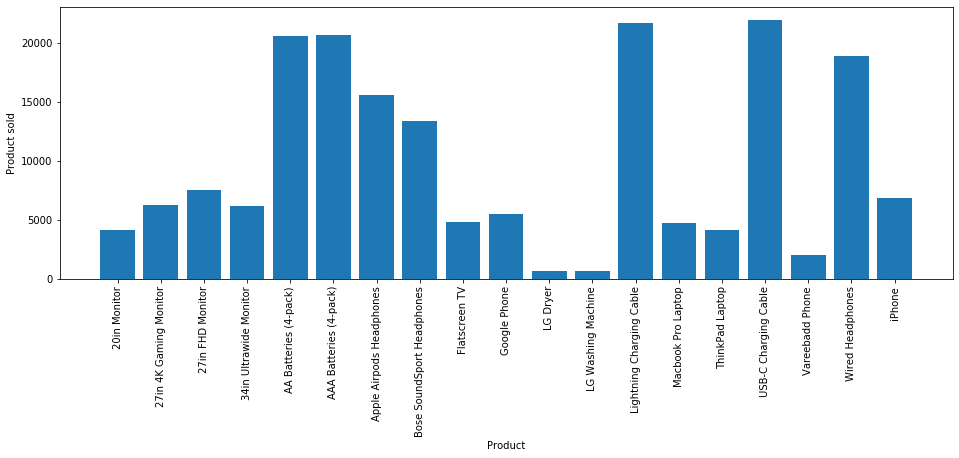

In [206]:
plt.figure(figsize = (16,5))

plt.bar(df_prod.index, df_prod.values)
plt.xticks(rotation = 90)
plt.xlabel('Product')
plt.ylabel('Product sold')
plt.show()